In [1]:
# Plot all Utah counties (background grey) and highlight one county
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [ ]:
'''
Overall instructions:
As described in the homework description, each graphic you make must:
   1. Have a thoughtful title
   2. Have clearly labelled axes 
   3. Be legible
   4. Not be a pie chart
I should be able to run your .py file and recreate the graphics without error.
As per usual, any helper variables or columns you create should be thoughtfully
named.
'''

covid_df.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/2990211562.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask = pd.to_datetime(covid_df_UT.columns, errors='coerce').notna()
/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/2990211562.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts.index = pd.to_datetime(ts.index)
/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/2990211562.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts.index = pd.to_datetime(ts.index)


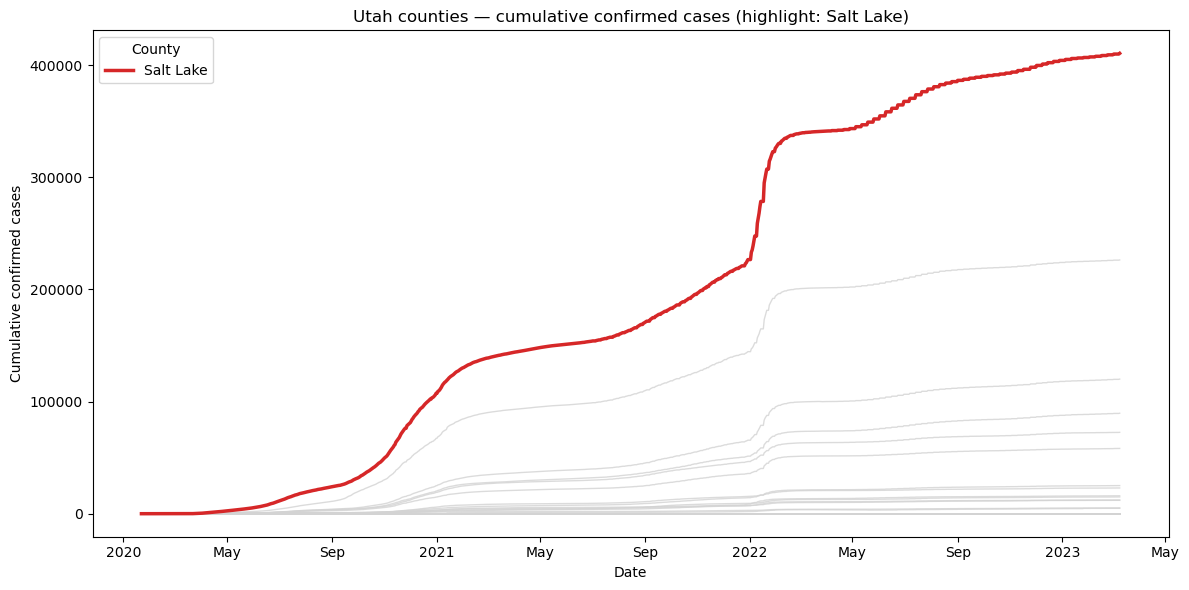

In [ ]:
'''
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis
'''


covid_df_UT = covid_df[covid_df['Province_State'] == 'Utah'].copy()

date_mask = pd.to_datetime(covid_df_UT.columns, errors='coerce').notna()

date_cols = covid_df_UT.columns[date_mask]
date_cols = sorted(date_cols, key=lambda c: pd.to_datetime(c))

# Aggregate rows by county name if there are duplicates (safer than set_index alone)
df_by_county = covid_df_UT.groupby('Admin2')[date_cols].sum()
# Transpose so rows = dates, columns = counties, then convert index to datetime
ts = df_by_county.T
ts.index = pd.to_datetime(ts.index)

fig, ax = plt.subplots(figsize=(12,6))
for county in ts.columns:
    ax.plot(ts.index, ts[county], color='lightgrey', linewidth=1, alpha=0.8)

# Highlight county with most cases to date
highlight = ts.iloc[-1].idxmax()
ax.plot(ts.index, ts[highlight], color='C3', linewidth=2.5, label=highlight)

ax.set_title(f'Utah counties — cumulative confirmed cases (highlight: {highlight})')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative confirmed cases')

#mdates to format dates on x axis
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.legend(title='County')
plt.tight_layout()
plt.show()

/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/37789454.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask_UT = pd.to_datetime(covid_df_UT.columns, errors='coerce').notna()
/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/37789454.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask_FL = pd.to_datetime(covid_df_FL.columns, errors='coerce').notna()
/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/37789454.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_UT.index = pd.to_datetime(ts_UT.index)


Utah county with most cases to date:
Salt Lake 410508
Florida county with most cases to date:
Miami-Dade 1552197


/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/37789454.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_FL.index = pd.to_datetime(ts_FL.index)


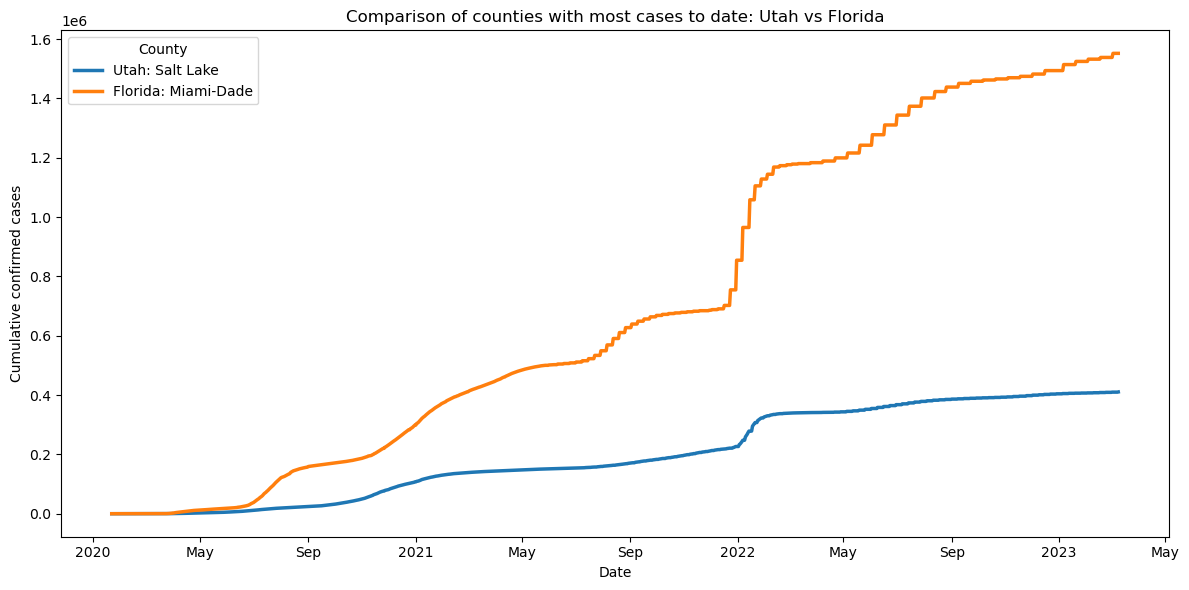

In [27]:
'''
Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable
'''

covid_df_UT = covid_df[covid_df['Province_State'] == 'Utah'].copy()
covid_df_FL = covid_df[covid_df['Province_State'] == 'Florida'].copy()

# Detect date columns (vectorized) - UT
date_mask_UT = pd.to_datetime(covid_df_UT.columns, errors='coerce').notna()
date_cols_UT = covid_df_UT.columns[date_mask_UT]
# Detect date columns (vectorized) - FL
date_mask_FL = pd.to_datetime(covid_df_FL.columns, errors='coerce').notna()
date_cols_FL = covid_df_FL.columns[date_mask_FL]
# Aggregate rows by county name if there are duplicates - UT
df_by_county_UT = covid_df_UT.groupby('Admin2')[date_cols_UT].sum()
# Aggregate rows by county name if there are duplicates - FL
df_by_county_FL = covid_df_FL.groupby('Admin2')[date_cols_FL].sum()

df_by_county_UT = df_by_county_UT.loc[[df_by_county_UT[date_cols_UT[-1]].idxmax()]]
df_by_county_FL = df_by_county_FL.loc[[df_by_county_FL[date_cols_FL[-1]].idxmax()]]

print("Utah county with most cases to date:")
print(df_by_county_UT.index[0], df_by_county_UT[date_cols_UT[-1]].values[0])
print("Florida county with most cases to date:")
print(df_by_county_FL.index[0], df_by_county_FL[date_cols_FL[-1]].values[0])
# Transpose so rows = dates, columns = counties, then convert index to datetime - UT
ts_UT = df_by_county_UT.T
ts_UT.index = pd.to_datetime(ts_UT.index)
# Transpose so rows = dates, columns = counties, then convert index to datetime - FL
ts_FL = df_by_county_FL.T
ts_FL.index = pd.to_datetime(ts_FL.index)


fig, ax = plt.subplots(figsize=(12,6))

ax.plot(ts_UT.index, ts_UT[df_by_county_UT.index[0]], color='C0', linewidth=2.5, label=f'Utah: {df_by_county_UT.index[0]}')
ax.plot(ts_FL.index, ts_FL[df_by_county_FL.index[0]], color='C1', linewidth=2.5, label=f'Florida: {df_by_county_FL.index[0]}')
ax.set_title('Comparison of counties with most cases to date: Utah vs Florida')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative confirmed cases')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.legend(title='County')
plt.tight_layout()
plt.show()  

/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/68785657.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask_SLC = pd.to_datetime(covid_df_SLC.columns, errors='coerce').notna()
/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/68785657.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_SLC.index = pd.to_datetime(ts_SLC.index)


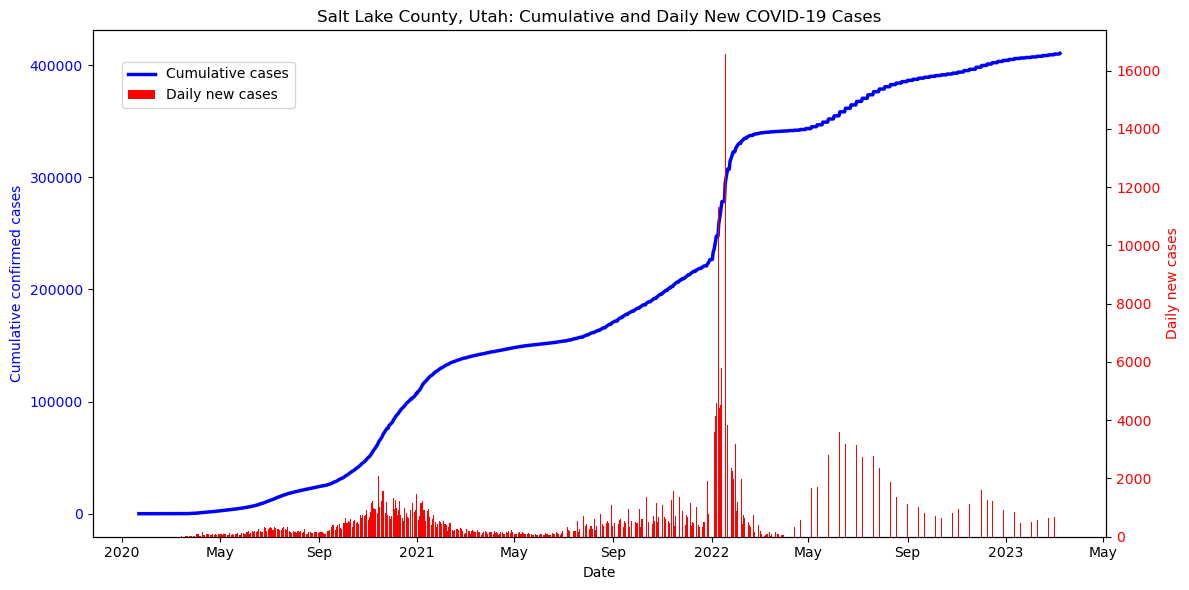

In [ ]:
'''
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis
'''

# Select a Salt Lake County, Utah
covid_df_SLC = covid_df[covid_df['Admin2'] == 'Salt Lake'].copy()
date_mask_SLC = pd.to_datetime(covid_df_SLC.columns, errors='coerce').notna()
date_cols_SLC = covid_df_SLC.columns[date_mask_SLC]

# Aggregate rows by county name if there are duplicates
covid_df_SLC = covid_df_SLC.groupby('Admin2')[date_cols_SLC].sum()

# Transpose so rows = dates, columns = counties, then convert index to datetime
ts_SLC = covid_df_SLC.T
ts_SLC.index = pd.to_datetime(ts_SLC.index)

# Calculate daily new cases and create a new column
daily_new_cases = ts_SLC['Salt Lake'].diff().fillna(0).astype(int)

fig, ax1 = plt.subplots(figsize=(12,6))

# Create the first y-axis for cumulative cases
color1 = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative confirmed cases', color=color1)
ax1.plot(ts_SLC.index, ts_SLC['Salt Lake'], color=color1, linewidth=2.5, label='Cumulative cases')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

# Create a second y-axis for daily new cases
ax2 = ax1.twinx()
color2 = 'red'
ax2.set_ylabel('Daily new cases', color=color2)
ax2.bar(ts_SLC.index, daily_new_cases, color=color2, label='Daily new cases')
ax2.tick_params(axis='y', labelcolor=color2)

#Plat title and legend
ax1.set_title('Salt Lake County, Utah: Cumulative and Daily New COVID-19 Cases')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

fig.tight_layout()
plt.show()

/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/507575003.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_mask_NY = pd.to_datetime(covid_df_NY.columns, errors='coerce').notna()
/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/507575003.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_NY.index = pd.to_datetime(ts_NY.index)
/var/folders/9s/37mwkx9j7693ct5vw9t2xj8h0000gn/T/ipykernel_74653/507575003.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral') 

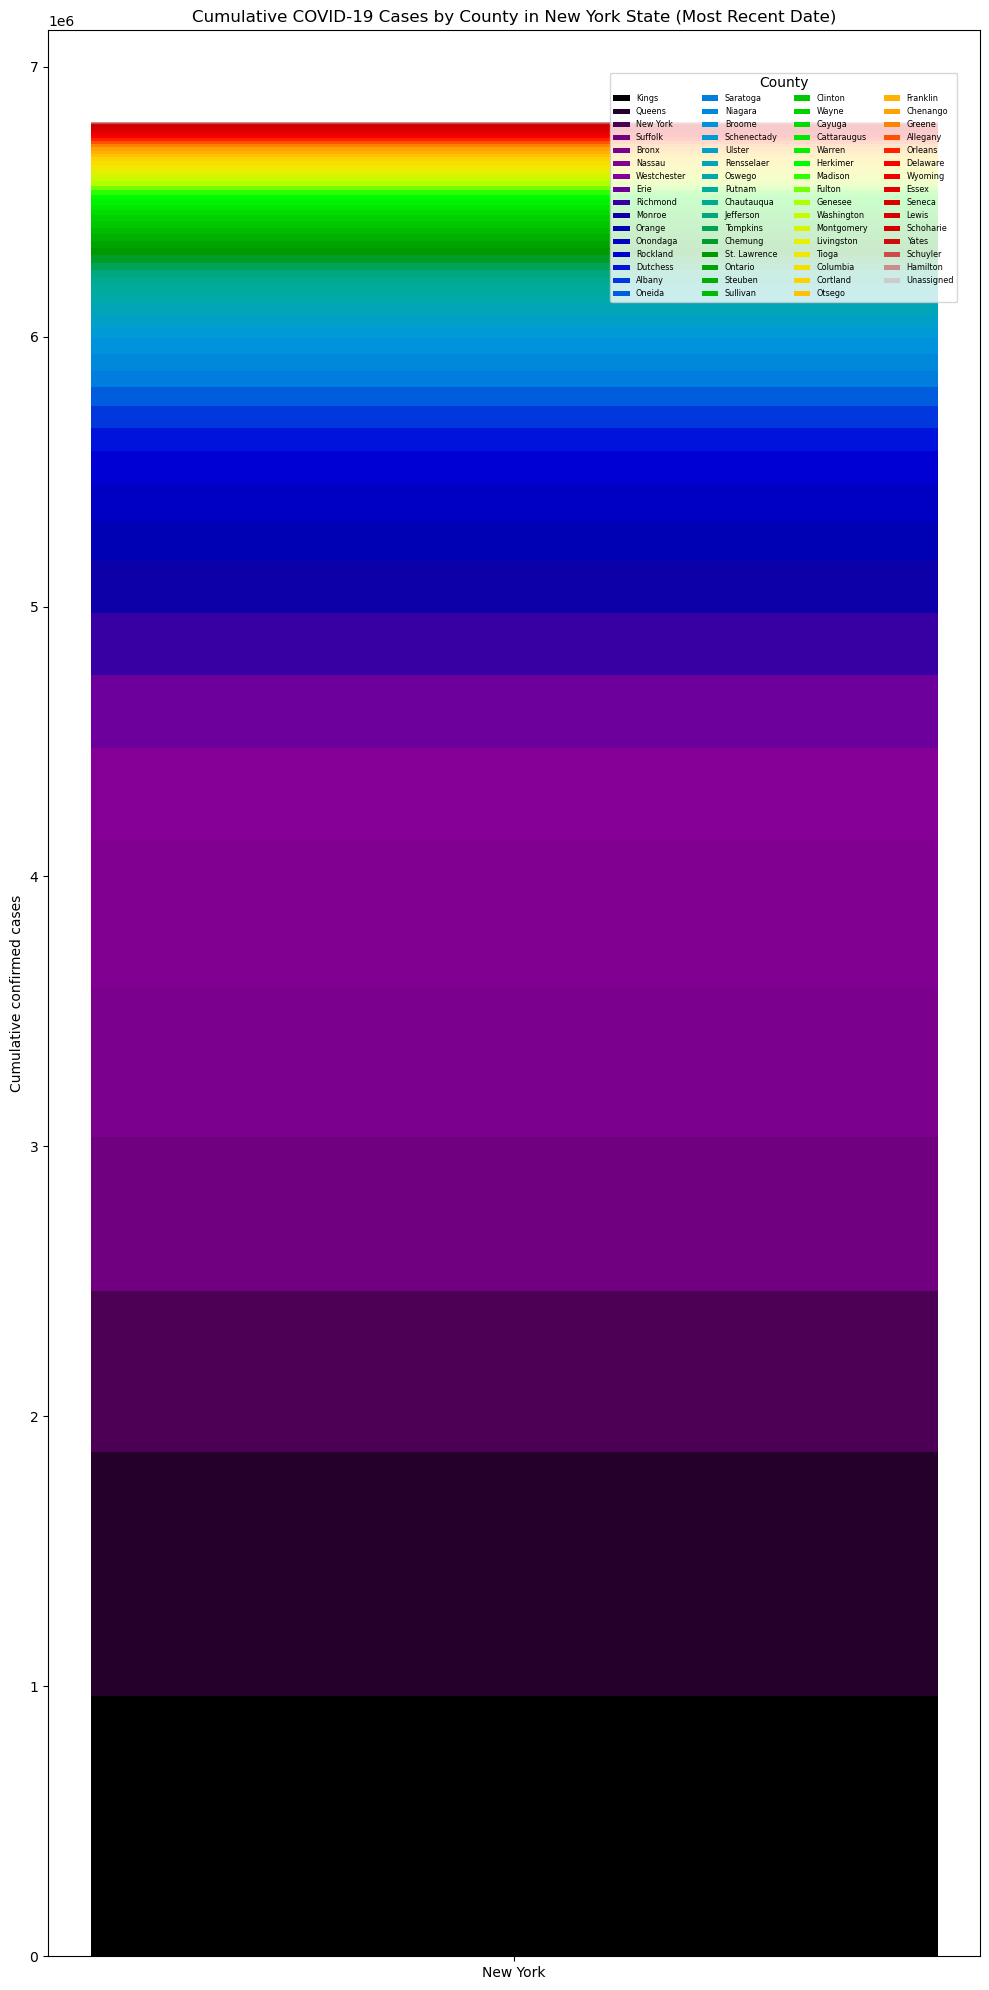

In [49]:
'''
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county
'''

# Select a state (e.g., New York)
covid_df_NY = covid_df[covid_df['Province_State'] == 'New York'].copy()

# Create date mask and date columns - NY
date_mask_NY = pd.to_datetime(covid_df_NY.columns, errors='coerce').notna()
date_cols_NY = covid_df_NY.columns[date_mask_NY]
# Aggregate rows by county name if there are duplicates - NY
df_by_county_NY = covid_df_NY.groupby('Admin2')[date_cols_NY].sum()


# Transpose so rows = dates, columns = counties, then convert index to datetime - NY
ts_NY = df_by_county_NY.T
ts_NY.index = pd.to_datetime(ts_NY.index)
# Select the most recent date for the stacked bar chart
latest_date = ts_NY.index.max()
latest_data = ts_NY.loc[latest_date]
# Remove any non-county rows (e.g. 'Out of NY') if present
latest_data = latest_data.drop(index='Out of NY', errors='ignore')
# Sort counties by number of cases
latest_data = latest_data.sort_values(ascending=False) 
latest_data.rename_axis('County', inplace=True)

# Ensure ordering you want (e.g., largest first)
latest_data = latest_data.sort_values(ascending=False)

counties = latest_data.index
cases = latest_data.values
N = len(counties)

N = len(latest_data)
cmap = plt.cm.get_cmap('nipy_spectral')   # or 'viridis', 'gist_ncar', 'hsv'
colors = [cmap(i/(N-1)) for i in range(N)]


# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10,20))
counties = latest_data.index
cases = latest_data.values


bottom=0
for color, county, val in zip(colors, counties, cases):
    ax.bar('New York', val, bottom=bottom, color=color)
    bottom += val


ax.set_title('Cumulative COVID-19 Cases by County in New York State (Most Recent Date)')
ax.set_ylabel('Cumulative confirmed cases')
# Move legend inside the axes and reduce font size to keep it compact
# Use multiple columns to reduce vertical length when there are many counties
ax.legend(counties, title='County', loc='upper right', bbox_to_anchor=(0.98, 0.98), fontsize='xx-small', ncol=4)

# Make the axes occupy the full figure height (100%)
fig.subplots_adjust(top=1.0, bottom=0.0)
plt.tight_layout()
plt.show()

In [ ]:
'''
Use Seaborn to create a grouped box plot of all reported states. Each boxplot
should be a distinct state. Have the states ordered from most cases (FL) to fewest 
cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)
'''